In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import zscore

In [56]:
file_path = r'C:\Users\adita\OneDrive\Desktop\Learnathon 4.0\Learnathon-4.0\Datasets\Auto_Insurance_Fraud_Claims_File02.csv'
df = pd.read_csv(file_path)


# <a id='toc1_'></a>[<b>Load Dataset</b>](#toc0_)


In [57]:

# Load the dataset
try:
    df = pd.read_csv(file_path)
    print(" Dataset loaded successfully!")
except Exception as e:
    print(" Error loading dataset:", e)
    exit()

# 1. Preview first 5 rows
print("\n First 5 Rows:")
print(df.head())

# 2. Dataset shape
print(f"\n Dataset Shape: {df.shape} (rows, columns)")

# 3. Column names and data types
print("\n Data Types:")
print(df.dtypes)

# 4. Summary statistics for numeric columns
print("\n Summary Statistics:")
print(df.describe())

# 5. Count of missing values
print("\n Missing Values:")
print(df.isnull().sum())

# 6. Count of duplicate rows
duplicates = df.duplicated().sum()
print(f"\n Duplicate Rows: {duplicates}")

 Dataset loaded successfully!

 First 5 Rows:
     Claim_ID Bind_Date1  Customer_Life_Value1  Age_Insured  Policy_Num  \
0  BB00000001  11/1/2022                    14           35   155203481   
1  BB00000002   1/1/2022                    24           30   189485666   
2  BB00000003  11/1/2022                    14           52   145849195   
3  BB00000004  11/1/2022                    14           39   183287405   
4  BB00000005  12/1/2022                    13           35   180131023   

  Policy_State Policy_Start_Date Policy_Expiry_Date Policy_BI  Policy_Ded  \
0           IN        10/12/2023          4/12/2024  500/1000        2000   
1           OH         9/14/2023          3/14/2024  500/1000        1000   
2           IL        10/30/2023          4/30/2024   250/500        1000   
3           OH         8/19/2023          2/19/2024   250/500        1000   
4           IL         9/25/2023          3/25/2024   100/300        2000   

   ...  DiffIN_Mileage  Low_Mileage_Disc

# <a ></a>[<b>Data cleaning</b>](#toc0_)


In [58]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the dataset

print("✅ Initial data loaded!")
print(f"📊 Initial shape: {df.shape}")

# 1. Remove duplicate rows
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"🧹 Removed {before - after} duplicate rows")

# 2. Identify missing values
total_missing = df.isnull().sum()
missing_cols = total_missing[total_missing > 0]
print(f"\n🔍 Columns with missing values:\n{missing_cols}")

# 3. Drop columns with >30% missing values
threshold = 0.3
missing_ratio = df.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > threshold].index
df.drop(columns=cols_to_drop, inplace=True)
print(f"\n🗑️ Dropped columns with >30% missing values: {list(cols_to_drop)}")

# 4. Fill remaining missing numeric values with median
numeric_cols = df.select_dtypes(include=[np.number]).columns
num_missing_before = df[numeric_cols].isnull().sum().sum()
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
num_missing_after = df[numeric_cols].isnull().sum().sum()
print(f"🧮 Filled {num_missing_before - num_missing_after} missing numeric values with median")

# 5. Fill remaining missing categorical values with mode
categorical_cols = df.select_dtypes(include='object').columns
cat_missing_count = 0
for col in categorical_cols:
    count_before = df[col].isnull().sum()
    if count_before > 0:
        df[col] = df[col].fillna(df[col].mode()[0])
        cat_missing_count += count_before
print(f"🔤 Filled {cat_missing_count} missing categorical values with mode")

# 6. Final check
print(f"\n✅ Final shape: {df.shape}")
print("✅ All missing values handled!")

# Optional: Detect outliers for numeric columns using Z-score
z_score_threshold = 3
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outlier_counts = (z_scores > z_score_threshold).sum()
print("\n🚨 Outlier count per numeric column (Z-score > 3):")
print(pd.Series(outlier_counts, index=df.select_dtypes(include=[np.number]).columns))


✅ Initial data loaded!
📊 Initial shape: (20000, 53)
🧹 Removed 0 duplicate rows

🔍 Columns with missing values:
authorities_contacted    2005
Police_Report            7092
dtype: int64

🗑️ Dropped columns with >30% missing values: ['Police_Report']
🧮 Filled 0 missing numeric values with median
🔤 Filled 2005 missing categorical values with mode

✅ Final shape: (20000, 52)
✅ All missing values handled!

🚨 Outlier count per numeric column (Z-score > 3):
Customer_Life_Value1          0
Age_Insured                   0
Policy_Num                    0
Policy_Ded                    0
Policy_Premium               83
Umbrella_Limit              132
Insured_Zip                   0
Capital_Gains                 0
Capital_Loss                  0
Accident_Hour                 0
Num_of_Vehicles_Involved      0
Bodily_Injuries               0
Witnesses                     0
Auto_Year                     0
Vehicle_Cost                465
Annual_Mileage                0
DiffIN_Mileage                0
Lo

In [59]:
import numpy as np
from scipy import stats

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df[numeric_cols]))

# Create a mask for all rows where all z-scores < 3 (i.e., not an outlier)
non_outliers_mask = (z_scores < 3).all(axis=1)

# Filter the dataframe
df_cleaned = df[non_outliers_mask]

# Report
print(f"✅ Outliers removed. Rows before: {df.shape[0]}, after: {df_cleaned.shape[0]}")


✅ Outliers removed. Rows before: 20000, after: 18588


In [60]:
print(df.columns.tolist())


['Claim_ID', 'Bind_Date1', 'Customer_Life_Value1', 'Age_Insured', 'Policy_Num', 'Policy_State', 'Policy_Start_Date', 'Policy_Expiry_Date', 'Policy_BI', 'Policy_Ded', 'Policy_Premium', 'Umbrella_Limit', 'Insured_Zip', 'Gender', 'Education', 'Occupation', 'Hobbies', 'Insured_Relationship', 'Capital_Gains', 'Capital_Loss', 'Garage_Location', 'Accident_Date', 'Accident_Type', 'Collision_Type', 'Accident_Severity', 'authorities_contacted', 'Acccident_State', 'Acccident_City', 'Accident_Location', 'Accident_Hour', 'Num_of_Vehicles_Involved', 'Property_Damage', 'Bodily_Injuries', 'Witnesses', 'DL_Expiry_Date', 'Claims_Date', 'Auto_Make', 'Auto_Model', 'Auto_Year', 'Vehicle_Color', 'Vehicle_Cost', 'Annual_Mileage', 'DiffIN_Mileage', 'Low_Mileage_Discount', 'Fraud_Ind', 'Commute_Discount', 'Total_Claim', 'Injury_Claim', 'Property_Claim', 'Vehicle_Claim', 'Vehicle_Registration', 'Check_Point']


In [61]:
target_col = 'Fraud_Ind'
X = df.drop(columns=[target_col])
y = df[target_col]


# <a id='toc1_'></a>[<b>Data transformation</b>](#toc0_)


In [62]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Step 1: Prepare the dataset
df = df_cleaned.copy()
df = df.dropna(subset=['Fraud_Ind'])  # drop if target is missing
df['Fraud_Ind'] = df['Fraud_Ind'].map({'Y': 1, 'N': 0})  # map target

# Drop identifier columns
drop_cols = ['Claim_ID', 'Policy_Num', 'Vehicle_Registration', 'Check_Point']
df.drop(columns=drop_cols, errors='ignore', inplace=True)

# Step 2: Convert datetime columns
datetime_cols = [col for col in df.columns if 'Date' in col or 'Hour' in col]
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df.drop(col, axis=1, inplace=True)

# Step 3: Split features and target
X = df.drop('Fraud_Ind', axis=1)
y = df['Fraud_Ind']

# Step 4: Identify column types
new_datetime_cols = [col for col in X.columns if any(s in col for s in ['_year', '_month', '_day', '_weekday'])]
numerical_cols = [col for col in X.select_dtypes(include=['int64', 'float64']).columns if col not in new_datetime_cols]
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Step 5: Define transformers
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, categorical_cols)
])

# Step 6: Transform features
X_transformed = preprocessor.fit_transform(X)

# Step 7: Get feature names
encoded_cat_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
all_feature_names = numerical_cols + list(encoded_cat_names)

# Step 8: Create final DataFrame
df_transformed = pd.DataFrame(X_transformed, columns=all_feature_names)
df_transformed[new_datetime_cols] = X[new_datetime_cols].reset_index(drop=True)
df_transformed['Fraud_Ind'] = y.reset_index(drop=True)

print("✅ Final transformed dataset shape:", df_transformed.shape)


C:\Users\adita\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


✅ Final transformed dataset shape: (18588, 685)


In [64]:
print("Shape of df_transformed:", df_transformed.shape)
print("Shape of features_only (without Fraud_Ind):", features_only.shape)
print("Feature columns:", features_only.columns.tolist())


Shape of df_transformed: (18588, 685)
Shape of features_only (without Fraud_Ind): (18588, 684)
Feature columns: ['Customer_Life_Value1', 'Age_Insured', 'Policy_Ded', 'Policy_Premium', 'Umbrella_Limit', 'Insured_Zip', 'Capital_Gains', 'Capital_Loss', 'Num_of_Vehicles_Involved', 'Bodily_Injuries', 'Witnesses', 'Auto_Year', 'Vehicle_Cost', 'Annual_Mileage', 'DiffIN_Mileage', 'Low_Mileage_Discount', 'Commute_Discount', 'Total_Claim', 'Injury_Claim', 'Property_Claim', 'Vehicle_Claim', 'Policy_State_IL', 'Policy_State_IN', 'Policy_State_OH', 'Policy_BI_100/300', 'Policy_BI_250/500', 'Policy_BI_500/1000', 'Gender_FEMALE', 'Gender_MALE', 'Education_Associate', 'Education_College', 'Education_High School', 'Education_JD', 'Education_MD', 'Education_Masters', 'Education_PhD', 'Occupation_adm-clerical', 'Occupation_armed-forces', 'Occupation_craft-repair', 'Occupation_exec-managerial', 'Occupation_farming-fishing', 'Occupation_handlers-cleaners', 'Occupation_machine-op-inspct', 'Occupation_other-

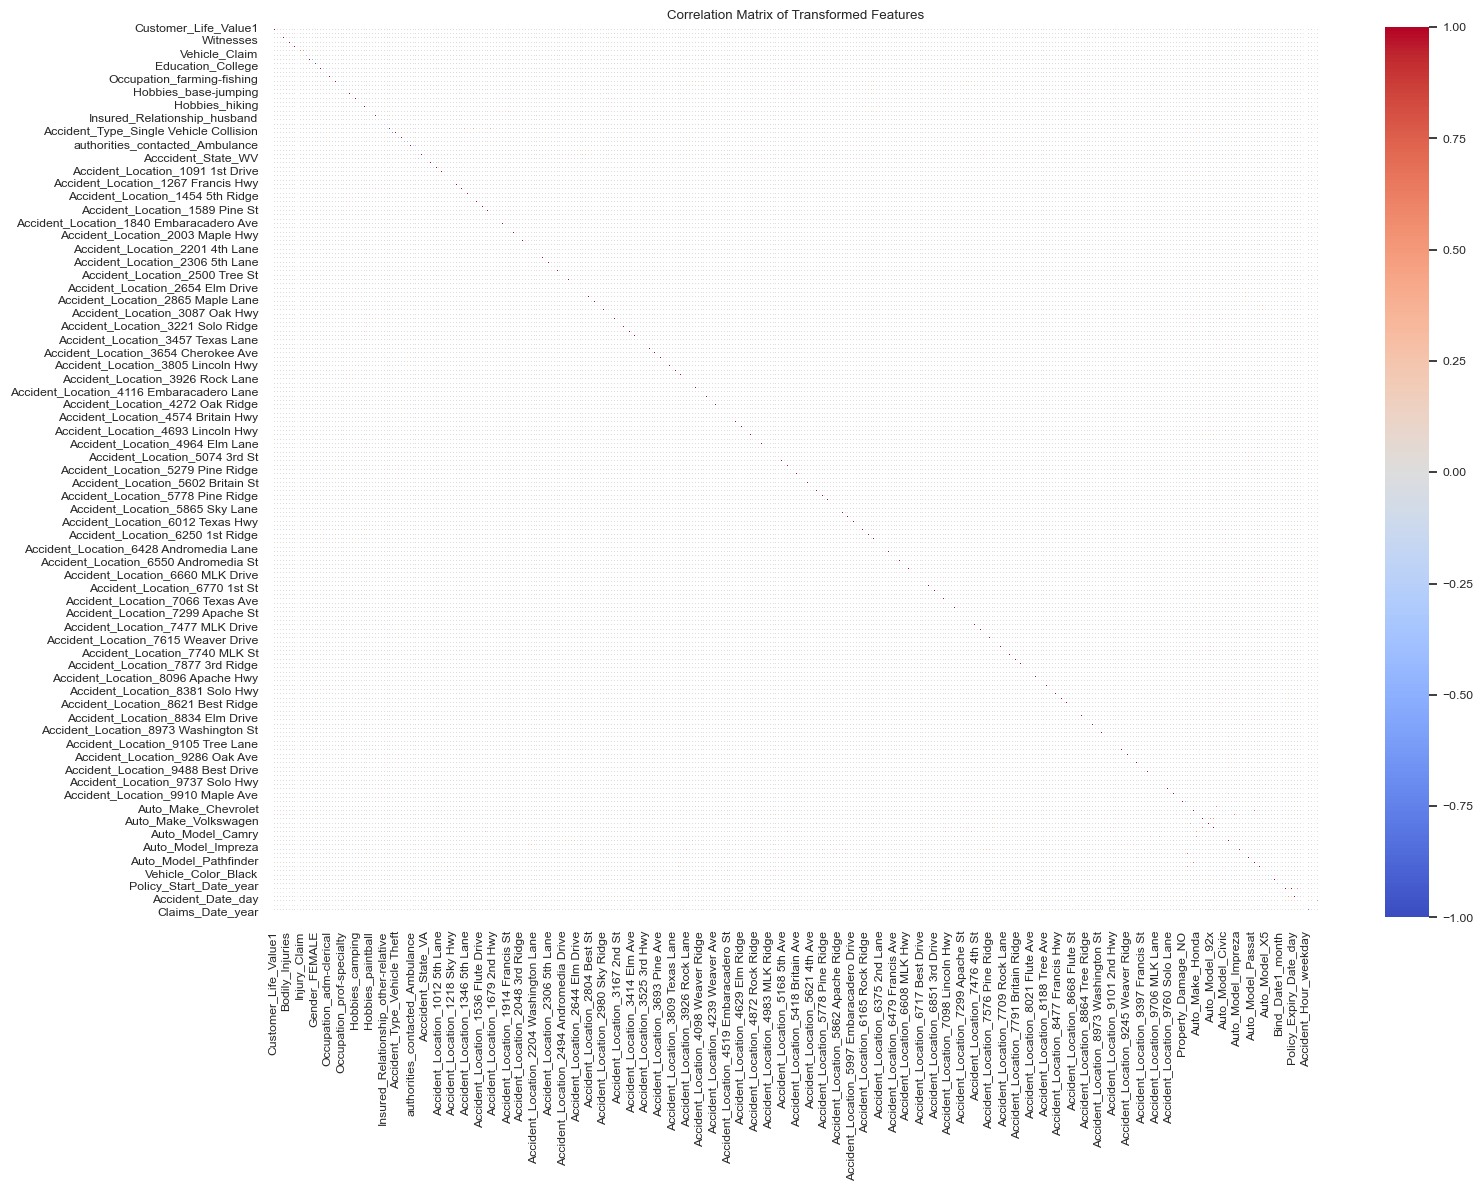

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'df_transformed' is your final, numeric-only DataFrame
# If needed, exclude the target column ('Fraud_Ind') from correlation
features_only = df_transformed.drop(columns=['Fraud_Ind'], errors='ignore')

# Compute the correlation matrix
correlation_matrix = features_only.corr()

# Set plot size and font scale
plt.figure(figsize=(16, 12))
sns.set(font_scale=0.8)

# Create the heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix of Transformed Features')
plt.tight_layout()
plt.show()
